In [30]:
import pandas as pd

path ="/Users/yusuf.bektas/Quant/drl-crypto/results/20250727_183142_longshort_1800s_c00000/results.csv"
df = pd.read_csv(path)
df = df.sort_values(by="train_sharpe", ascending=False).reset_index(drop=True)
df

,window,lr,beta,batch_size,train_sharpe,val_sharpe,train_eq,val_eq
0,72,0.00005,0.050,128,2.336640,-0.670260,2.518395,0.948290
1,36,0.00010,0.050,256,2.018860,-0.549240,2.455418,0.948634
2,72,0.00010,0.005,128,1.832721,3.150817,1.931059,1.284062
3,72,0.00010,0.050,256,1.276069,1.868415,1.675752,1.153794
4,72,0.00005,0.005,128,1.270833,1.110195,1.580065,1.068058
...,...,...,...,...,...,...,...,...
67,36,0.00001,0.050,64,-1.010669,-1.073874,0.680273,0.942561
68,36,0.00001,0.005,256,-1.156380,-0.116487,0.662531,0.993760
69,36,0.00001,0.050,256,-1.280964,-1.004365,0.630493,0.957081
70,36,0.00001,0.050,512,-1.329085,0.248509,0.635363,1.013569


In [32]:
print(df.iloc[:5])



   window       lr   beta  batch_size  train_sharpe  val_sharpe  train_eq  \
0      72  0.00005  0.050         128      2.336640   -0.670260  2.518395   
1      36  0.00010  0.050         256      2.018860   -0.549240  2.455418   
2      72  0.00010  0.005         128      1.832721    3.150817  1.931059   
3      72  0.00010  0.050         256      1.276069    1.868415  1.675752   
4      72  0.00005  0.005         128      1.270833    1.110195  1.580065   

     val_eq  
0  0.948290  
1  0.948634  
2  1.284062  
3  1.153794  
4  1.068058  


<Axes: title={'center': 'Average Sharpe Ratio by Window Size'}, xlabel='window'>

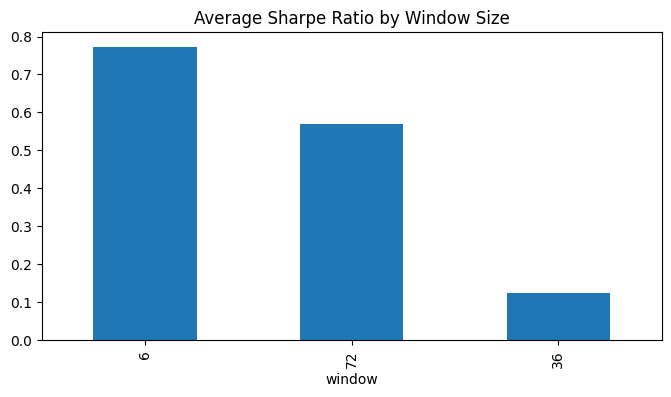

In [33]:
df.groupby("window").train_sharpe.mean().sort_values(ascending=False).plot(kind="bar", figsize=(8, 4), title="Average Sharpe Ratio by Window Size")

<Axes: title={'center': 'Average Sharpe Ratio by Learning Rate'}, xlabel='lr'>

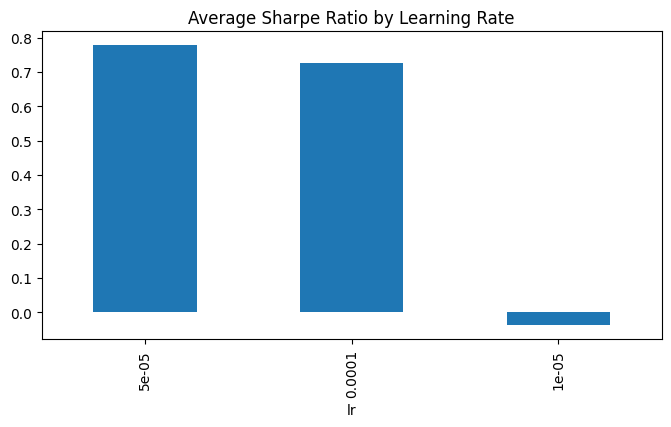

In [34]:
df.groupby("lr").train_sharpe.mean().sort_values(ascending=False).plot(kind="bar", figsize=(8, 4), title="Average Sharpe Ratio by Learning Rate")

<Axes: title={'center': 'Average Sharpe Ratio by Batch Size'}, xlabel='batch_size'>

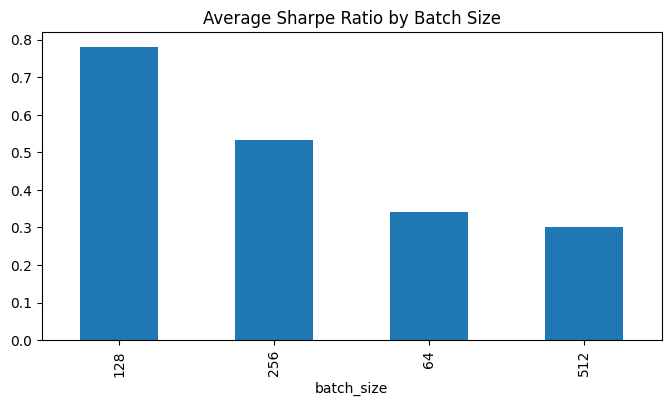

In [35]:
df.groupby("batch_size").train_sharpe.mean().sort_values(ascending=False).plot(kind="bar", figsize=(8, 4), title="Average Sharpe Ratio by Batch Size")

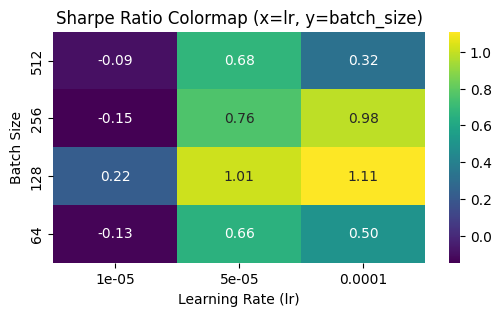

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for Sharpe ratio

pivot = df.pivot_table(index="batch_size", columns="lr", values="train_sharpe", aggfunc="mean")
pivot = pivot.sort_index(ascending=False).sort_index(axis=1, ascending=True)
plt.figure(figsize=(6, 3))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="viridis")
plt.title("Sharpe Ratio Colormap (x=lr, y=batch_size)")
plt.xlabel("Learning Rate (lr)")
plt.ylabel("Batch Size")
plt.show()

In [37]:
print(pivot)

lr           0.00001   0.00005   0.00010
batch_size                              
512        -0.093912  0.675573  0.323456
256        -0.145736  0.760457  0.981068
128         0.221351  1.013951  1.108377
64         -0.133442  0.657254  0.496067


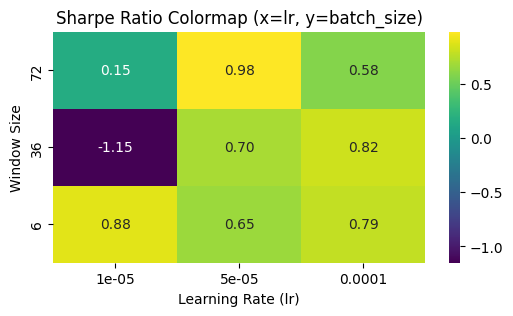

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for Sharpe ratio

pivot = df.pivot_table(index="window", columns="lr", values="train_sharpe", aggfunc="mean")
pivot = pivot.sort_index(ascending=False).sort_index(axis=1, ascending=True)

plt.figure(figsize=(6, 3))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="viridis")
plt.title("Sharpe Ratio Colormap (x=lr, y=batch_size)")
plt.xlabel("Learning Rate (lr)")
plt.ylabel("Window Size")
plt.show()

In [39]:
print(pivot)


lr       0.00001   0.00005   0.00010
window                              
72      0.154617  0.976618  0.578928
36     -1.149652  0.701031  0.817604
6       0.881231  0.652778  0.785194


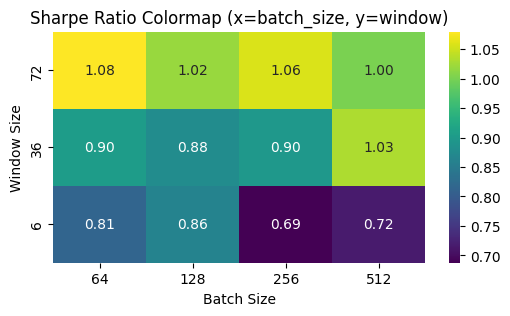

In [24]:

pivot = df.pivot_table(index="window", columns="batch_size", values="train_sharpe", aggfunc="mean")
pivot = pivot.sort_index(ascending=False).sort_index(axis=1, ascending=True)
plt.figure(figsize=(6, 3))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="viridis")
plt.title("Sharpe Ratio Colormap (x=batch_size, y=window)")
plt.xlabel("Batch Size")
plt.ylabel("Window Size")
plt.show()  